<a href="https://colab.research.google.com/github/Ali-Khamis45/MyFirstMLProject-HousePricePrediction/blob/main/advTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

In [54]:
data=pd.read_csv('/content/USA Housing Dataset.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [6]:
data['city'].unique()

array(['Seattle', 'Carnation', 'Issaquah', 'Maple Valley', 'Kent',
       'Redmond', 'Clyde Hill', 'Shoreline', 'Mercer Island', 'Auburn',
       'Bellevue', 'Duvall', 'Renton', 'Sammamish', 'Woodinville',
       'Kirkland', 'Burien', 'Federal Way', 'Normandy Park', 'Vashon',
       'Kenmore', 'Yarrow Point', 'SeaTac', 'Newcastle', 'Covington',
       'Lake Forest Park', 'Snoqualmie', 'Des Moines', 'Fall City',
       'Ravensdale', 'Tukwila', 'North Bend', 'Medina', 'Bothell',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Black Diamond',
       'Beaux Arts Village', 'Algona', 'Preston', 'Milton', 'Skykomish'],
      dtype=object)

In [12]:
data['country'].unique()

array(['USA'], dtype=object)

In [14]:
data['yr_renovated'].unique()

array([   0, 2007, 2003, 2006, 1970, 2009, 1990, 1994, 2000, 1983, 2001,
       2014, 1923, 1956, 1997, 1989, 1981, 1912, 2004, 1979, 1984, 2011,
       1982, 1999, 2002, 1969, 2012, 2013, 1972, 2008, 2005, 1988, 1998,
       1985, 1974, 1971, 1996, 2010, 1954, 1963, 1992, 1945, 1993, 1968,
       1995, 1986, 1934, 1953, 1966, 1955, 1958, 1987, 1960, 1978, 1980,
       1948, 1991, 1913, 1977, 1975])

In [13]:
data['statezip'].unique()

array(['WA 98103', 'WA 98014', 'WA 98029', 'WA 98117', 'WA 98146',
       'WA 98038', 'WA 98031', 'WA 98136', 'WA 98122', 'WA 98053',
       'WA 98105', 'WA 98004', 'WA 98112', 'WA 98155', 'WA 98126',
       'WA 98040', 'WA 98092', 'WA 98005', 'WA 98019', 'WA 98118',
       'WA 98006', 'WA 98178', 'WA 98106', 'WA 98116', 'WA 98058',
       'WA 98074', 'WA 98077', 'WA 98033', 'WA 98115', 'WA 98052',
       'WA 98168', 'WA 98107', 'WA 98042', 'WA 98027', 'WA 98125',
       'WA 98072', 'WA 98166', 'WA 98003', 'WA 98109', 'WA 98177',
       'WA 98034', 'WA 98070', 'WA 98199', 'WA 98028', 'WA 98023',
       'WA 98133', 'WA 98056', 'WA 98030', 'WA 98008', 'WA 98108',
       'WA 98102', 'WA 98001', 'WA 98075', 'WA 98188', 'WA 98007',
       'WA 98065', 'WA 98059', 'WA 98198', 'WA 98002', 'WA 98144',
       'WA 98024', 'WA 98051', 'WA 98055', 'WA 98045', 'WA 98039',
       'WA 98119', 'WA 98032', 'WA 98011', 'WA 98022', 'WA 98148',
       'WA 98068', 'WA 98047', 'WA 98057', 'WA 98010', 'WA 980

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [8]:
data.isna().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.shape

(4140, 18)

In [56]:
data['price'].min() #how come

0.0

In [57]:
data['price'].max()

26590000.0

In [58]:
data['price'].mean()

np.float64(553062.8772890784)

In [60]:
data = data[data['price'] > 1000]
print("New Min Price:", data['price'].min())

New Min Price: 7800.0


In [64]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
data = data[(data['price'] >= lower_limit) & (data['price'] <= upper_limit)]

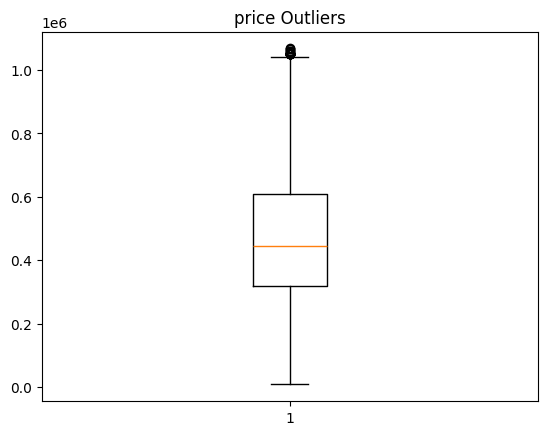

In [65]:
plt.boxplot(data['price'])
plt.title("price Outliers")
plt.show()

In [74]:
NewData=data.to_csv('NewData.csv')

In [80]:
newNewdata = pd.read_csv('/content/NewData.csv')
newNewdata.head()

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
3,4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
4,5,2014-05-10 00:00:00,320000.0,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,Cedar to Green River Trail,Maple Valley,WA 98038,USA


In [82]:
x = newNewdata.iloc[:, 3:14]
y = newNewdata.iloc[:, 2]

,price
0,376000.000000
1,800000.000000
2,324000.000000
3,549900.000000
4,320000.000000
...,...
3822,308166.666667
3823,534333.333333
3824,416904.166667
3825,203400.000000


In [83]:
le = LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = le.fit_transform(x[col])
        print(f"Column '{col}' has been encoded.")

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#model.fit(x_train, y_train)

LinearRegression()

In [85]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [86]:
model.score(x_train, y_train)

0.7643009948388103

In [87]:
model.score(x_test, y_test)

0.5118929016707663

In [88]:
x_train_prediction = model.predict(x_train)
x_train_prediction

array([592927.13863433, 410343.9410401 , 673102.56153174, ...,
       446011.91673182, 547100.87627983, 583039.54709867])

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import gradio as gr

data = pd.read_csv('NewData.csv')

x = data.iloc[:, 3:14]
y = data.iloc[:, 2]

le = LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = le.fit_transform(x[col])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(x_train_scaled, y_train)

def predict_house_price(bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built):
    try:
        features = np.array([[bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built]])
        features_scaled = scaler.transform(features)
        prediction = model.predict(features_scaled)
        return f"Predicted Price: {int(prediction[0]):,} LE"
    except Exception as e:
        return f"Error: {str(e)}"

inputs = [
    gr.Number(label="Bedrooms"), gr.Number(label="Bathrooms"),
    gr.Number(label="Sqft Living"), gr.Number(label="Sqft Lot"),
    gr.Number(label="Floors"), gr.Number(label="Waterfront (0/1)"),
    gr.Number(label="View"), gr.Number(label="Condition"),
    gr.Number(label="Sqft Above"), gr.Number(label="Sqft Basement"),
    gr.Number(label="Year Built")
]

gr.Interface(fn=predict_house_price, inputs=inputs, outputs="text", title="House Price Predictor").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a78d00c48e83b4bafa.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
